In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_csv(file_path):
    return pd.read_csv(file_path)

file1 = r"C:\Users\User\Downloads\SBA-class-activity-main\ibm.csv"

ibm = load_csv(file1)
display(ibm.head(5))

,Date,Open,High,Low,Close,Volume
0,1962-01-02,5.04610,5.04610,4.98716,4.98716,593562.955237
1,1962-01-03,4.98716,5.03292,4.98716,5.03292,445175.034277
2,1962-01-04,5.03292,5.03292,4.98052,4.98052,399513.586679
3,1962-01-05,4.97389,4.97389,4.87511,4.88166,559321.480565
4,1962-01-08,4.88166,4.88166,4.75059,4.78972,833273.771393


In [3]:
ibm.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## Changing the 'Date' to datetime tyoe. 

In [5]:
ibm['Date'] = pd.to_datetime(ibm['Date'], format='mixed')

In [8]:
ibm['Date'].dtypes

dtype('<M8[ns]')

In [9]:
ibm.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

`parse_dates=['Date']` while reading the dataset also changes the format to datatime.   

## Setting 'Date' as the index 

In [12]:
ibm = ibm.set_index('Date')

In [13]:
display(ibm.head(5))

,Open,High,Low,Close,Volume
Date,,,,,
1962-01-02,5.04610,5.04610,4.98716,4.98716,593562.955237
1962-01-03,4.98716,5.03292,4.98716,5.03292,445175.034277
1962-01-04,5.03292,5.03292,4.98052,4.98052,399513.586679
1962-01-05,4.97389,4.97389,4.87511,4.88166,559321.480565
1962-01-08,4.88166,4.88166,4.75059,4.78972,833273.771393


## Checking for missing values

In [15]:
print(ibm.isna().sum())

Open      0
High      0
Low       0
Close     0
Volume    1
dtype: int64


# Plots

<Axes: xlabel='Date'>

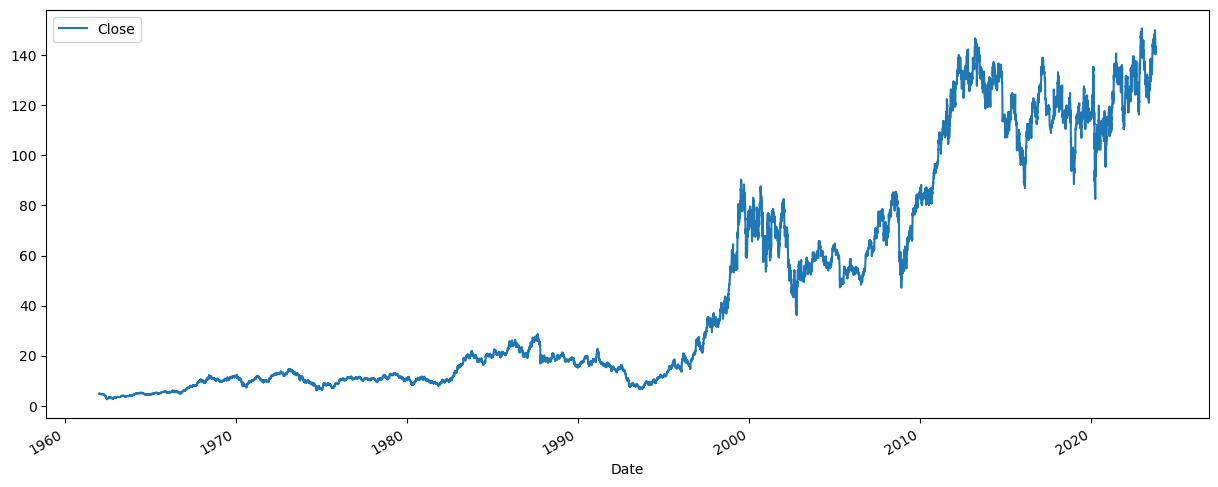

In [22]:
ibm.plot(y='Close', figsize=(15,6))

<Axes: xlabel='Date'>

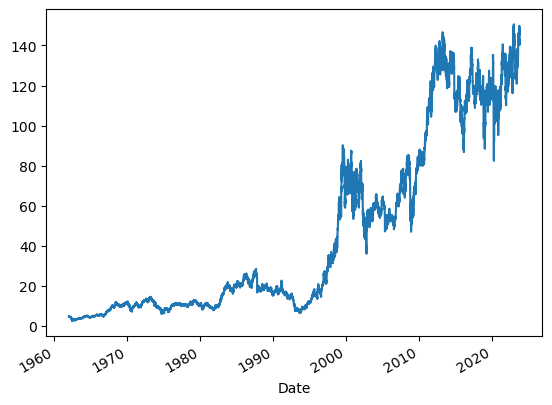

In [25]:
ibm['Close'].plot() # works this way as well

<Axes: xlabel='Date'>

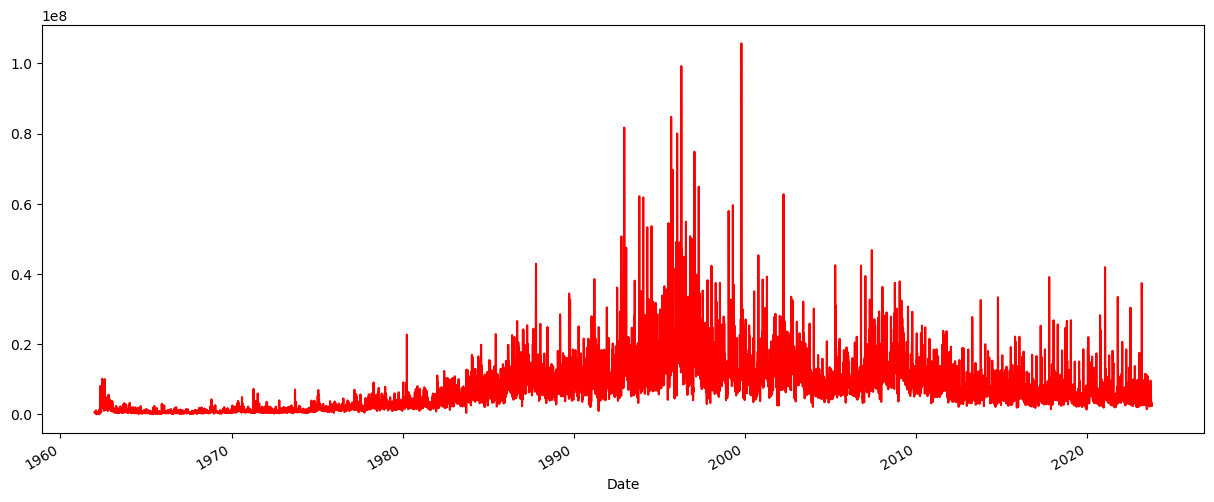

In [37]:
ibm['Volume'].plot(figsize=(15,6), color='red')

In [38]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='Date'>

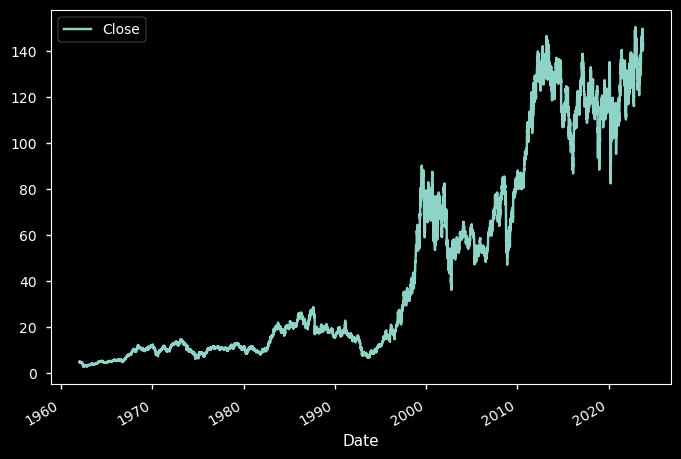

In [40]:
plt.style.use('dark_background')
ibm.plot(y='Close')

<Axes: xlabel='Date'>

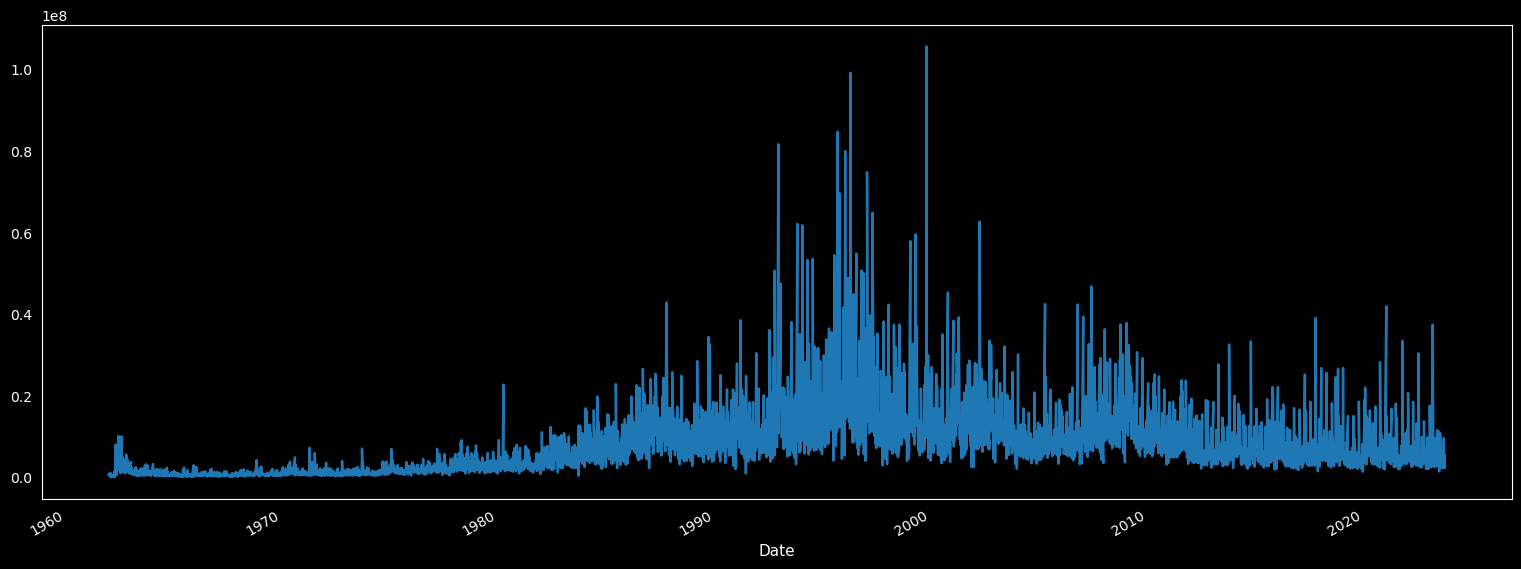

In [43]:
plt.style.use('_mpl-gallery-nogrid')
ibm['Volume'].plot(figsize=(15,6))

## Ranking the performance of the stock and showing it as a bar chart

In [47]:
def rank_performance(stock_price):
    if stock_price <= 50:
        return "Poor"
    elif stock_price > 50 and stock_price <=100:
        return "Satisfactory"
    else:
        return "Excellent"

ibm['Close'].apply

<bound method Series.apply of Date
1962-01-02      4.98716
1962-01-03      5.03292
1962-01-04      4.98052
1962-01-05      4.88166
1962-01-08      4.78972
                ...    
2023-10-05    141.52000
2023-10-06    142.03000
2023-10-09    142.20000
2023-10-10    142.11000
2023-10-11    143.23000
Name: Close, Length: 15546, dtype: float64>

<Axes: xlabel='Close'>

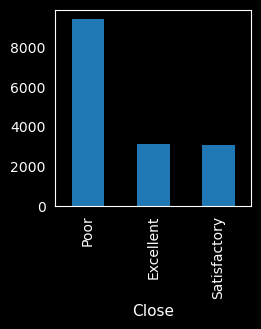

In [50]:
ibm['Close'].apply(rank_performance).value_counts().plot(kind='bar')

<Axes: ylabel='count'>

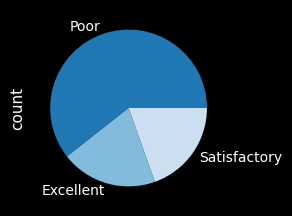

In [52]:
ibm['Close'].apply(rank_performance).value_counts().plot(kind='pie')